In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
# Read the data
data = pd.read_csv('TSLA.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2302,2024-02-27,204.039993,205.600006,198.259995,199.729996,199.729996,108645400
2303,2024-02-28,200.419998,205.300003,198.440002,202.039993,202.039993,99806200
2304,2024-02-29,204.179993,205.279999,198.449997,201.880005,201.880005,85907000
2305,2024-03-01,200.520004,204.520004,198.500000,202.639999,202.639999,82099200
2306,2024-03-04,198.729996,199.750000,186.720001,188.139999,188.139999,133131110


In [3]:
# Drop unnecessary columns
data.drop("Adj Close", axis = 1,inplace = True)

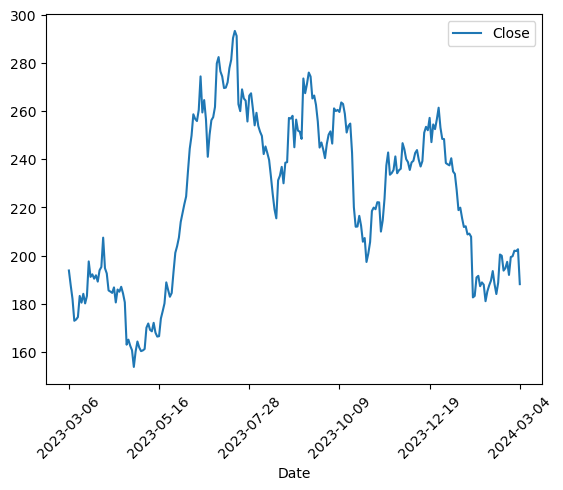

In [4]:
# Visualize the data
data.plot(x="Date", y="Close")
plt.xticks(size=10,rotation=45)
plt.show()

In [5]:
# Data exploration
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [6]:
# Convert column to its proper data type
data['Date']= pd.to_datetime(data['Date'])

In [7]:
#Explore data
data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

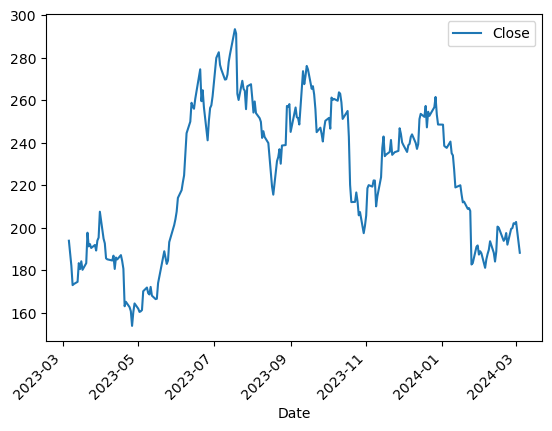

In [8]:
# Visualize data
data.plot(x="Date", y="Close")
plt.xticks(size=10,rotation=45)
plt.show()

In [9]:
# Data exploration
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
# Data exploration
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [11]:
#Get data's info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Open    251 non-null    float64       
 2   High    251 non-null    float64       
 3   Low     251 non-null    float64       
 4   Close   251 non-null    float64       
 5   Volume  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [12]:
# Split data
X = data[['Open','High','Low','Volume']]
y = data['Close']

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
# Fit data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict data
predicted = regressor.predict(X_test)

In [15]:
# Show prediction
print(X_test)

           Open        High         Low     Volume
153  262.920013  265.410004  256.630005  111508100
122  238.580002  257.480011  237.770004  134047600
92   290.149994  295.260010  286.010010  112434700
158  225.949997  230.610001  216.779999  170772700
149  253.979996  261.649994  250.649994  117947000
..          ...         ...         ...        ...
134  277.549988  278.980011  271.000000  133422800
15   194.419998  197.389999  189.940002  120851600
191  242.919998  246.570007  239.169998  126436200
74   275.130005  276.989990  257.779999  211797100
7    180.800003  182.339996  176.029999  145995600

[63 rows x 4 columns]


In [16]:
# Create a dataframe 
dataframe = pd.DataFrame({'Actual Price':y_test,'Predicted Price': predicted})
dataframe.head(10)

,Actual Price,Predicted Price
153,258.869995,259.812122
122,257.179993,251.721980
92,293.339996,290.814907
158,220.110001,221.873999
149,260.529999,257.181717
162,212.419998,216.447540
152,262.989990,263.937607
83,282.480011,282.357204
63,217.610001,218.513346
144,250.220001,251.042033


In [17]:
# Calculate score percentage
score = regressor.score(X_test,y_test)

In [18]:
# Calculate r2 score percentage
r2 = r2_score(y_test, predicted)
print("R^2 Score:", r2)

R^2 Score: 0.9953337660275353


<AxesSubplot:>

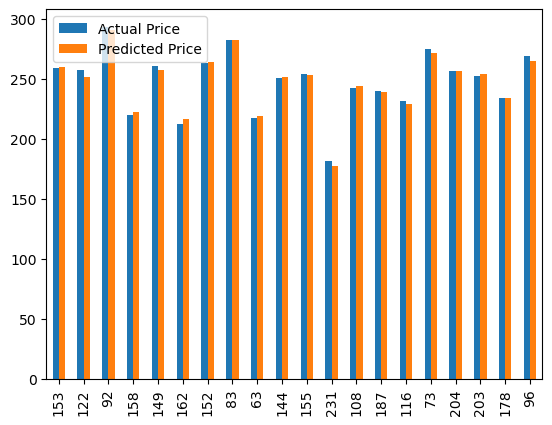

In [19]:
graph = dataframe.head(20)
graph.plot(kind='bar')

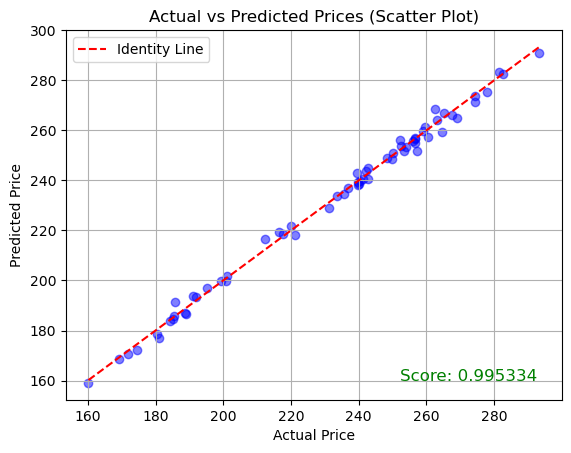

In [20]:
# Create scatter plot

plt.scatter(dataframe['Actual Price'], dataframe['Predicted Price'], color='blue', alpha=0.5)
plt.plot([dataframe['Actual Price'].min(), dataframe['Actual Price'].max()], 
         [dataframe['Actual Price'].min(), dataframe['Actual Price'].max()], 
         color='red', linestyle='--', label='Identity Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Scatter Plot)')
plt.legend()

# Display the score number on the plot with more decimals
plt.text(0.95, 0.05, f'Score: {score:.6f}', transform=plt.gca().transAxes, 
         fontsize=12, color='green', ha='right')

plt.grid(True)
plt.show()

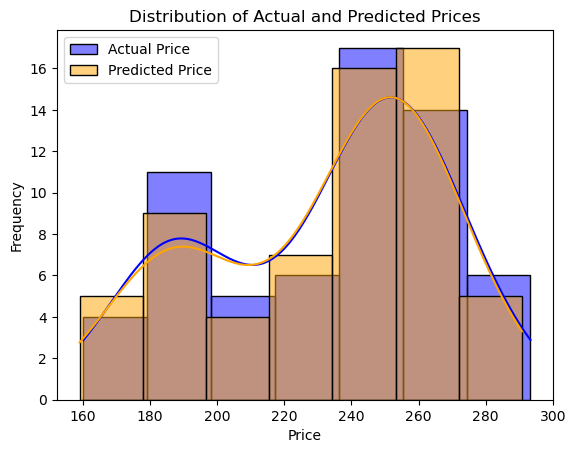

In [21]:
# Set up the figure

# Plot the histogram/density plot for actual price
sns.histplot(dataframe['Actual Price'], kde=True, color='blue', label='Actual Price')

# Plot the histogram/density plot for predicted price
sns.histplot(dataframe['Predicted Price'], kde=True, color='orange', label='Predicted Price')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Prices')
plt.legend()

# Show the plot
plt.show()

In [24]:
import matplotlib. dates as mandates
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras import layers

In [25]:
lstm_df = pd.read_csv('TSLA.csv')

lstm_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...,...
2302,2024-02-27,204.039993,205.600006,198.259995,199.729996,199.729996,108645400
2303,2024-02-28,200.419998,205.300003,198.440002,202.039993,202.039993,99806200
2304,2024-02-29,204.179993,205.279999,198.449997,201.880005,201.880005,85907000
2305,2024-03-01,200.520004,204.520004,198.500000,202.639999,202.639999,82099200


In [26]:
lstm_df = lstm_df[['Date', 'Close']]

lstm_df

,Date,Close
0,2015-01-02,14.620667
1,2015-01-05,14.006000
2,2015-01-06,14.085333
3,2015-01-07,14.063333
4,2015-01-08,14.041333
...,...,...
2302,2024-02-27,199.729996
2303,2024-02-28,202.039993
2304,2024-02-29,201.880005
2305,2024-03-01,202.639999


In [27]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2015-01-02')
datetime_object

datetime.datetime(2015, 1, 2, 0, 0)

In [28]:
lstm_df['Date'] = lstm_df['Date'].apply(str_to_datetime)
lstm_df['Date']

C:\Users\Neltr\AppData\Local\Temp\ipykernel_136576\3981775961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_df['Date'] = lstm_df['Date'].apply(str_to_datetime)


0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
2302   2024-02-27
2303   2024-02-28
2304   2024-02-29
2305   2024-03-01
2306   2024-03-04
Name: Date, Length: 2307, dtype: datetime64[ns]

In [29]:
lstm_df.index = lstm_df.pop('Date')
lstm_df

,Close
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333
...,...
2024-02-27,199.729996
2024-02-28,202.039993
2024-02-29,201.880005


In [30]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(lstm_df, 
                                '2019-03-04', 
                                '2024-03-04', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2019-03-04,20.982668,21.325333,19.652666,19.024000
1,2019-03-05,21.325333,19.652666,19.024000,18.436001
2,2019-03-06,19.652666,19.024000,18.436001,18.416000
3,2019-03-07,19.024000,18.436001,18.416000,18.439333
4,2019-03-08,18.436001,18.416000,18.439333,18.942667
...,...,...,...,...,...
1255,2024-02-27,197.410004,191.970001,199.399994,199.729996
1256,2024-02-28,191.970001,199.399994,199.729996,202.039993
1257,2024-02-29,199.399994,199.729996,202.039993,201.880005
1258,2024-03-01,199.729996,202.039993,201.880005,202.639999


In [31]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1260,), (1260, 3, 1), (1260,))

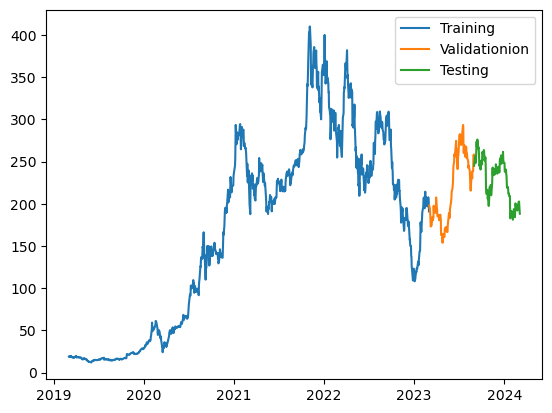

In [32]:
eighty_percent = int(len(dates) * .8)
ninety_percent = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:eighty_percent], X[:eighty_percent], y[:eighty_percent]

dates_val, X_val, y_val = dates[eighty_percent:ninety_percent], X[eighty_percent:ninety_percent], y[eighty_percent:ninety_percent]
dates_test, X_test, y_test = dates[ninety_percent:], X[ninety_percent:], y[ninety_percent:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Training', 'Validationion', 'Testing'])

In [33]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100


32/32 [==============================] - 2s 16ms/step - loss: 39894.6758 - mean_absolute_error: 164.6618 - val_loss: 48051.3477 - val_mean_absolute_error: 215.4928
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 38329.6641 - mean_absolute_error: 159.1882 - val_loss: 43683.5586 - val_mean_absolute_error: 205.0847
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 31819.5840 - mean_absolute_error: 142.6667 - val_loss: 28511.8535 - val_mean_absolute_error: 163.8491
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 17991.2852 - mean_absolute_error: 103.2435 - val_loss: 8626.2930 - val_mean_absolute_error: 84.0007
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5321.7188 - mean_absolute_error: 45.4635 - val_loss: 604.1155 - val_mean_absolute_error: 18.0662
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1075.8843 - mean_absolute_error: 16.9341 - val_loss: 56

Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 72.8726 - mean_absolute_error: 5.6275 - val_loss: 171.7875 - val_mean_absolute_error: 11.5654
Epoch 47/100
32/32 [==============================] - 0s 2ms/step - loss: 110.3862 - mean_absolute_error: 7.2087 - val_loss: 64.5748 - val_mean_absolute_error: 6.4197
Epoch 48/100
32/32 [==============================] - 0s 3ms/step - loss: 75.3846 - mean_absolute_error: 5.8984 - val_loss: 54.8108 - val_mean_absolute_error: 5.4747
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 72.2281 - mean_absolute_error: 5.5744 - val_loss: 50.2906 - val_mean_absolute_error: 5.3071
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 69.0149 - mean_absolute_error: 5.4095 - val_loss: 58.9897 - val_mean_absolute_error: 5.9876
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 67.5321 - mean_absolute_error: 5.3264 - val_loss: 62.1159 - val_mean_absolute_error: 5.9771
E

32/32 [==============================] - 0s 2ms/step - loss: 74.5843 - mean_absolute_error: 5.6535 - val_loss: 51.6514 - val_mean_absolute_error: 5.4975
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 71.5540 - mean_absolute_error: 5.5139 - val_loss: 53.3257 - val_mean_absolute_error: 5.6836
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 66.2144 - mean_absolute_error: 5.2431 - val_loss: 86.7037 - val_mean_absolute_error: 6.9809
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 82.3222 - mean_absolute_error: 5.9620 - val_loss: 95.2230 - val_mean_absolute_error: 7.9720
Epoch 99/100
32/32 [==============================] - 0s 2ms/step - loss: 83.7902 - mean_absolute_error: 6.0662 - val_loss: 108.3842 - val_mean_absolute_error: 8.5043
Epoch 100/100
32/32 [==============================] - 0s 2ms/step - loss: 72.7792 - mean_absolute_error: 5.6056 - val_loss: 53.3868 - val_mean_absolute_error: 5.5320


32/32 [==============================] - 0s 1ms/step


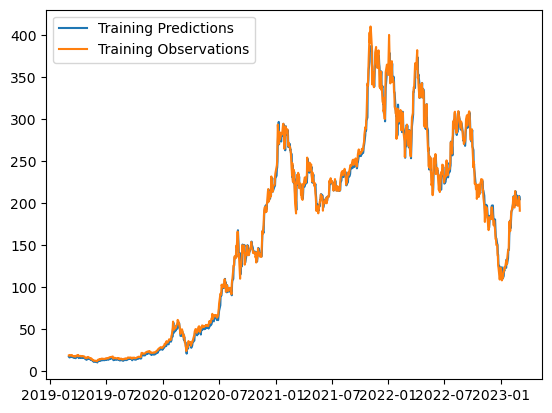

In [34]:
prediction_mod = model.predict(X_train).flatten()
plt.plot(dates_train, prediction_mod)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

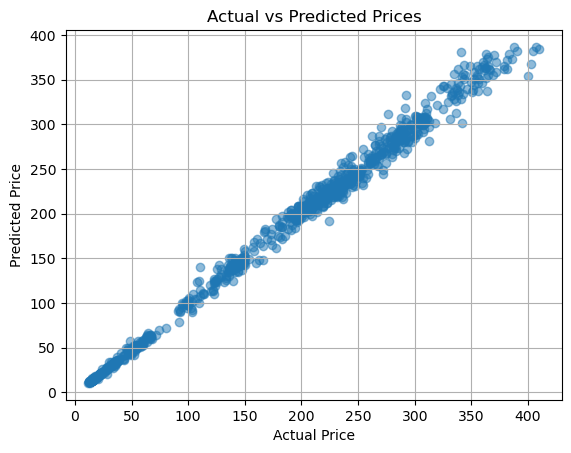

In [35]:
plt.scatter(y_train, prediction_mod, alpha=0.5)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')



plt.grid(True)
plt.show()

In [36]:
predictions_df = pd.DataFrame({'Date':dates_train, 'Actual Price':y_train,'Predicted Price': prediction_mod})
predictions_df.head(50)

,Date,Actual Price,Predicted Price
0,2019-03-04,19.024000,17.333139
1,2019-03-05,18.436001,16.920591
2,2019-03-06,18.416000,16.467863
3,2019-03-07,18.439333,16.617678
4,2019-03-08,18.942667,16.687914
5,2019-03-11,19.394667,17.297081
6,2019-03-12,18.890667,17.718649
7,2019-03-13,19.264000,16.971394
8,2019-03-14,19.330667,17.515066
9,2019-03-15,18.362000,17.535255


In [37]:
predictions_df.tail(50)

,Date,Actual Price,Predicted Price
958,2022-12-19,149.869995,151.428345
959,2022-12-20,137.800003,150.441742
960,2022-12-21,137.570007,139.458603
961,2022-12-22,125.349998,138.417786
962,2022-12-23,123.150002,127.033363
963,2022-12-27,109.099998,124.060257
964,2022-12-28,112.709999,110.604317
965,2022-12-29,121.820000,113.159393
966,2022-12-30,123.180000,122.824852
967,2023-01-03,108.099998,123.663200
